In [1]:
# HIDDEN
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

### Choosing a Sample Size ###
Candidate A is contesting an election. A polling organization wants to estimate the proportion of voters who will vote for her. Let's suppose that they plan to take a simple random sample of voters, though in reality their method of sampling would be more complex. How can they decide how large their sample should be, to get a desired level of accuracy?

We are now in a position to answer this question, after making a few assumptions:
- The population of voters is very large and that therefore we can just as well assume that the random sample will be drawn with replacement.
- The polling organization will make its estimate by constructing an approximate 95% confidence interval for the percent of voters who will vote for Candidate A.
- The desired level of accuracy is that the width of the interval should be no more than 1%. That's pretty accurate! For example, the confidence interval (33.2%, 34%) would be fine but (33.2%, 35%) would not.

We will work with the sample proportion of voters for Candidate A. Recall that a proportion is a mean, when the values in the population are only 0 (the type of individual you are not counting) or 1 (the type of individual you are counting).

### Width of Confidence Interval ###
If we had a random sample, we could go about using the bootstrap to construct a confidence interval for the percent of voters for Candidate A. But we don't have a sample yet – we are trying to find out how big the sample has to be so that our confidence interval is as narrow as we want it to be.

In situations like this, it helps to see what theory predicts.

The Central Limit Theorem says that the probabilities for the sample proportion are roughly normally distributed, centered at the population proportion of 1's, with an SD equal to the SD of the population of 0's and 1's divided by the square root of the sample size.

So the confidence interval will still be the "middle 95%" of a normal distribution, even though we can't pick off the ends as the 2.5th and 97.5th percentiles of bootstrapped proportions. 

Is there another way to find how wide the interval would be? Yes, because we know that for normally distributed variables, the interval "center $\pm$ 2 SDs" contains 95% of the data.

The confidence interval will stretch for 2 SDs of the sample proportion, on either side of the center. So the width of the interval will be 4 SDs of the sample proportion.

We are willing to tolerate a width of 1% = 0.01. So, using the formula developed in the last section, 

$$
4 \times \frac{\mbox{SD of the 0-1 population}}{\sqrt{\mbox{sample size}}}
~ \le ~ 0.01
$$

So

$$
\sqrt{\mbox{sample size}} ~ \ge ~ 4 \times \frac{\mbox{SD of the 0-1 population}}{0.01}
$$

### The SD of a collection of 0's and 1's ###
If we knew the SD of the population, we'd be done. We could calculate the square root of the sample size, and then take the square to get the sample size. But we don't know the SD of the population. The population consists of 1 for each voter for Candidate A, and 0 for all other voters, and *we don't know what proportion of each kind there are.* That's what we're trying to estimate.

So are we stuck? No, because we can *bound* the SD of the population. Here are histograms of two such distributions, one for an equal proportion of 1's and 0's, and one with 90% 1's and 10% 0's. Which one has the bigger SD? 

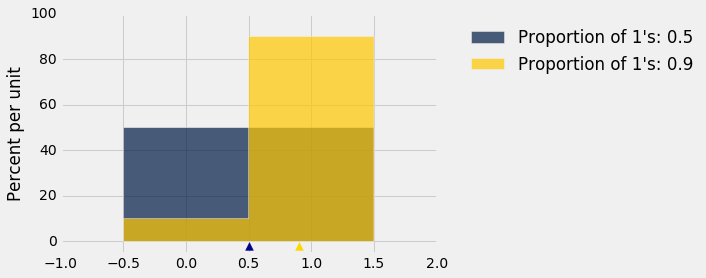

In [2]:
# HIDDEN 
pop_50 = make_array(1, 1, 1, 1, 1, 0, 0, 0, 0, 0)
pop_90 = make_array(1, 1, 1, 1, 1, 1, 1, 1, 1, 0)

coins = Table().with_columns(
   "Proportion of 1's: 0.5", pop_50,
   "Proportion of 1's: 0.9", pop_90,
)
coins.hist(bins=np.arange(-0.5, 1.6, 1))
plots.scatter(0.5, -0.02, marker='^', color='darkblue', s=60)
plots.scatter(0.9, -0.02, marker='^', color='gold', s=60)
plots.ylim(-0.05, 1);

Remember that the possible values in the population are only 0 and 1.

The blue histogram (50% 1's and 50% 0's) has more spread than the gold. The mean is 0.5. Half the deviations from mean are equal to 0.5 and the other half equal to -0.5, so the SD is 0.5.

In the gold histogram, all of the area is being squished up around 1, leading to less spread. 90% of the deviations are small: 0.1. The other 10% are -0.9 which is large, but overall the spread is smaller than in the blue histogram.

The same observation would hold if we varied the proportion of 1's or let the proportion of 0's be larger than the proportion of 1's. Let's check this by calculating the SDs of populations of 10 elements that only consist of 0's and 1's, in varying proportions. The function `np.ones` is useful for this. It takes a positive integer as its argument and returns an array consisting of that many 1's.

In [5]:
sd = make_array()
for i in np.arange(1, 10, 1):
    # Create an array of i 1's and (10-i) 0's
    population = np.append(np.ones(i), 1-np.ones(10-i))
    sd = np.append(sd, np.std(population))
    
zero_one_sds = Table().with_columns(
    "Population Proportion of 1's", np.arange(0.1, 1, 0.1),
    "Population SD", sd
)

zero_one_sds

Population Proportion of 1's,Population SD
0.1,0.3
0.2,0.4
0.3,0.458258
0.4,0.489898
0.5,0.5
0.6,0.489898
0.7,0.458258
0.8,0.4
0.9,0.3


Not surprisingly, the SD of a population with 10% 1's and 90% 0's is the same as that of a population with 90% 1's and 10% 0's. That's because you switch the bars of one histogram to get the other; there is no change in spread.

More importantly for our purposes, the SD increases as the proportion of 1's increases, until the proportion of 1's is 0.5; then it starts to decrease symmetrically.

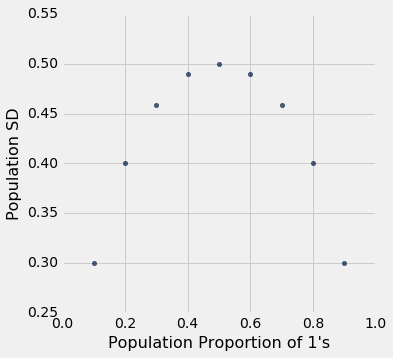

In [6]:
zero_one_sds.scatter("Population Proportion of 1's")

**Summary:** The SD of a population of 1's and 0's is at most 0.5. That's the value of the SD when 50% of the population is coded 1 and the other 50% are coded 0.

### The Sample Size ###
We know that 
$$
\sqrt{\mbox{sample size}} ~ \ge ~ 4 \times \frac{\mbox{SD of the 0-1 population}}{0.01}
$$
and that the SD of the 0-1 population is at most 0.5, regardless of the proportion of 1's in the population. So it is safe to take

$$
\sqrt{\mbox{sample size}} ~ \ge ~ 4 \times \frac{0.5}{0.01} ~=~ 200
$$

So the sample size should be at least $200^2 = 40,000$. That's an enormous sample! But that's what you need if you want to guarantee great accuracy with high confidence no matter what the population looks like.